In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
import sys
import os
import icecream as ic

ori_data_dir = '../data/original_data'
A375_data = pd.read_csv(os.path.join(ori_data_dir, 'A375.csv'))
A549_data = pd.read_csv(os.path.join(ori_data_dir, 'A549.csv'))
Jurkat_data = pd.read_csv(os.path.join(ori_data_dir, 'Jurkat.csv'))


In [10]:
A375_data.head()

,gene1_name,gene2_name,cell_line,label
0,MAP2K2,UBC,A375,0
1,HSP90AA1,MAP2K2,A375,0
2,CHEK2,MAP2K2,A375,0
3,AKT1,MAP2K2,A375,0
4,BCL2,MAP2K2,A375,0


In [11]:
# count zero values in label
def count_zero_label(data):
    count = 0
    for i in range(data.shape[0]):
        if data['label'][i] == 0:
            count += 1
    return count

def count_one_label(data):
    count = 0
    for i in range(data.shape[0]):
        if data['label'][i] == 1:
            count += 1
    return count

print('A375 zero label count:', count_zero_label(A375_data))
print('A549 zero label count:', count_zero_label(A549_data))
print('Jurkat zero label count:', count_zero_label(Jurkat_data))
print('A375 one label count:', count_one_label(A375_data))
print('A549 one label count:', count_one_label(A549_data))
print('Jurkat one label count:', count_one_label(Jurkat_data))

A375 zero label count: 513
A549 zero label count: 4167
Jurkat zero label count: 56996
A375 one label count: 22
A549 one label count: 179
Jurkat one label count: 295


In [15]:
# Count Unique Gene number
def get_unique_gene_list(data):
    gene_list = []
    for i in range(data.shape[0]):
        gene_1 = data['gene1_name'][i]
        gene_2 = data['gene2_name'][i]
        if gene_1 not in gene_list:
            gene_list.append(gene_1)
        if gene_2 not in gene_list:
            gene_list.append(gene_2)
    return gene_list



In [16]:
A375_gene_list = get_unique_gene_list(A375_data)
A549_gene_list = get_unique_gene_list(A549_data)
Jurkat_gene_list = get_unique_gene_list(Jurkat_data)

In [17]:
print('A375 Gene number:', len(A375_gene_list))
print('A549 Gene number:', len(A549_gene_list))
print('Jurkat Gene number:', len(Jurkat_gene_list))


A375 Gene number: 396
A549 Gene number: 755
Jurkat Gene number: 339


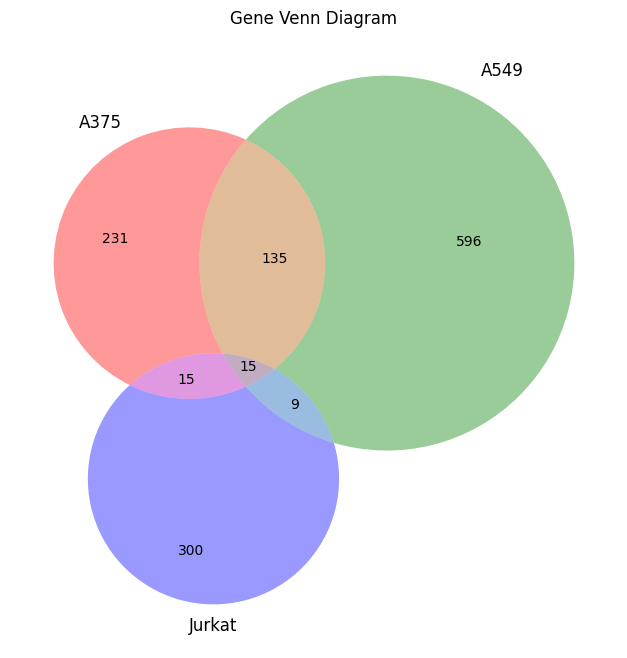

In [20]:
# 画图：维恩图
from matplotlib_venn import venn3
plt.figure(figsize=(8, 8))
venn3([set(A375_gene_list), set(A549_gene_list), set(Jurkat_gene_list)], ('A375', 'A549', 'Jurkat'))
# name: gene venn diagram
plt.title('Gene Venn Diagram')
plt.show()


In [31]:
# Get SL pairs
def get_SL_list(data):
    SL_pairs = []
    for i in range(data.shape[0]):
        if data['label'][i] == 1:
            gene_1 = data['gene1_name'][i]
            gene_2 = data['gene2_name'][i]
            SL_pairs.append((gene_1, gene_2))
    return SL_pairs
    
A375_SL_pairs = get_SL_list(A375_data)
A549_SL_pairs = get_SL_list(A549_data)
Jurkat_SL_pairs = get_SL_list(Jurkat_data)
print('A375 SL pairs number:', len(A375_SL_pairs))
print('A549 SL pairs number:', len(A549_SL_pairs))
print('Jurkat SL pairs number:', len(Jurkat_SL_pairs))


A375 SL pairs number: 22
A549 SL pairs number: 179
Jurkat SL pairs number: 295


In [35]:
# Find if there are identical SL pairs in different cell lines
# remember to check the two orders of gene pairs
def find_identical_SL_pairs(data1, data2):
    SL_pairs1 = get_SL_list(data1)
    SL_pairs2 = get_SL_list(data2)
    identical_SL_pairs = []
    for pair in SL_pairs1:
        if pair in SL_pairs2:
            identical_SL_pairs.append(pair)
        reversed_pair = (pair[1], pair[0])
        if reversed_pair in SL_pairs2:
            identical_SL_pairs.append(pair)
    return identical_SL_pairs

A375_A549_identical_SL_pairs = find_identical_SL_pairs(A375_data, A549_data)
A375_Jurkat_identical_SL_pairs = find_identical_SL_pairs(A375_data, Jurkat_data)
A549_Jurkat_identical_SL_pairs = find_identical_SL_pairs(A549_data, Jurkat_data)

print('A375 and A549 identical SL pairs number:', len(A375_A549_identical_SL_pairs))
print('A375 and Jurkat identical SL pairs number:', len(A375_Jurkat_identical_SL_pairs))
print('A549 and Jurkat identical SL pairs number:', len(A549_Jurkat_identical_SL_pairs))


A375 and A549 identical SL pairs number: 0
A375 and Jurkat identical SL pairs number: 0
A549 and Jurkat identical SL pairs number: 0


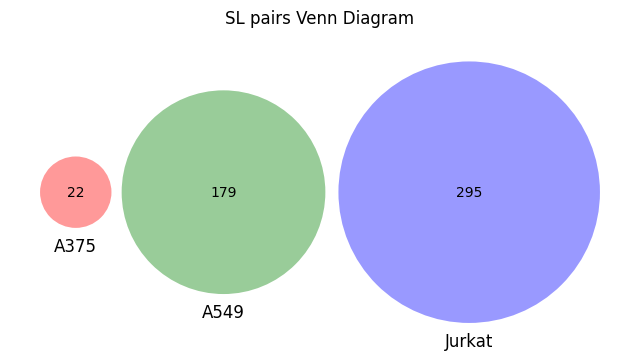

In [33]:
# Draw Venn Diagram

plt.figure(figsize=(8, 8))
venn3([set(A375_SL_pairs), set(A549_SL_pairs), set(Jurkat_SL_pairs)], ('A375', 'A549', 'Jurkat'))
plt.title('SL pairs Venn Diagram')
plt.show()


In [36]:
# Check Non-sl
def get_non_SL_list(data):
    non_SL_pairs = []
    for i in range(data.shape[0]):
        if data['label'][i] == 0:
            gene_1 = data['gene1_name'][i]
            gene_2 = data['gene2_name'][i]
            non_SL_pairs.append((gene_1, gene_2))
    return non_SL_pairs

A375_non_SL_pairs = get_non_SL_list(A375_data)
A549_non_SL_pairs = get_non_SL_list(A549_data)
Jurkat_non_SL_pairs = get_non_SL_list(Jurkat_data)
print('A375 non SL pairs number:', len(A375_non_SL_pairs))
print('A549 non SL pairs number:', len(A549_non_SL_pairs))
print('Jurkat non SL pairs number:', len(Jurkat_non_SL_pairs))

A375 non SL pairs number: 513
A549 non SL pairs number: 4167
Jurkat non SL pairs number: 56996


In [38]:
# Find identical non SL pairs
def find_identical_non_SL_pairs(data1, data2):
    non_SL_pairs1 = get_non_SL_list(data1)
    non_SL_pairs2 = get_non_SL_list(data2)
    identical_non_SL_pairs = []
    for pair in non_SL_pairs1:
        if pair in non_SL_pairs2:
            identical_non_SL_pairs.append(pair)
        reversed_pair = (pair[1], pair[0])
        if reversed_pair in non_SL_pairs2:
            identical_non_SL_pairs.append(pair)
    return identical_non_SL_pairs

A375_A549_identical_non_SL_pairs = find_identical_non_SL_pairs(A375_data, A549_data)
A375_Jurkat_identical_non_SL_pairs = find_identical_non_SL_pairs(A375_data, Jurkat_data)
A549_Jurkat_identical_non_SL_pairs = find_identical_non_SL_pairs(A549_data, Jurkat_data)

print('A375 and A549 identical non SL pairs number:', len(A375_A549_identical_non_SL_pairs))
print('A375 and Jurkat identical non SL pairs number:', len(A375_Jurkat_identical_non_SL_pairs))
print('A549 and Jurkat identical non SL pairs number:', len(A549_Jurkat_identical_non_SL_pairs))


A375 and A549 identical non SL pairs number: 302
A375 and Jurkat identical non SL pairs number: 4
A549 and Jurkat identical non SL pairs number: 3


In [40]:
A549_Jurkat_identical_non_SL_pairs

[('BUB3', 'RAE1'), ('POLR2B', 'POLR3B'), ('PGD', 'PGK1')]

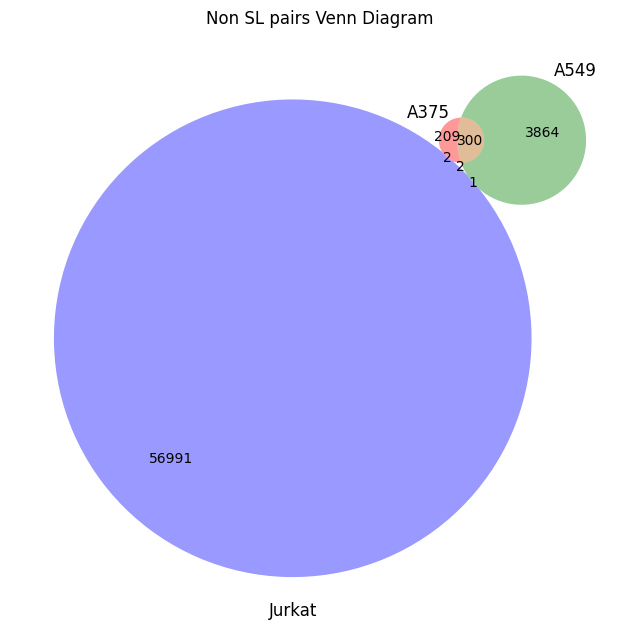

In [39]:
# Draw Venn Diagram
plt.figure(figsize=(8, 8))
venn3([set(A375_non_SL_pairs), set(A549_non_SL_pairs), set(Jurkat_non_SL_pairs)], ('A375', 'A549', 'Jurkat'))
plt.title('Non SL pairs Venn Diagram')
plt.show()

In [41]:
cell_line_adapted_train_data_path = '../data/original_data/Cell_line_adapted/sl_train_0.csv'
cell_line_adapted_train_data = pd.read_csv(cell_line_adapted_train_data_path)

In [44]:
cell_line_adapted_train_data

,gene1_name,gene2_name,cell_line,label
0,MAP2K2,UBC,0,0.0
1,HSP90AA1,MAP2K2,0,0.0
2,CHEK2,MAP2K2,0,0.0
3,AKT1,MAP2K2,0,0.0
4,BCL2,MAP2K2,0,0.0
...,...,...,...,...
57821,ZNF598,ZNHIT6,Jurkat,0.0
57822,ZNF598,ZNRD1,Jurkat,0.0
57823,ZNF830,ZNHIT6,Jurkat,0.0
57824,ZNF830,ZNRD1,Jurkat,0.0
